<a href="https://colab.research.google.com/github/Jesus-Manuel-Huerta-Najera/PrimerAnalisisDatos/blob/main/2_2_Preparaci%C3%B3nDeLosDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.2 Preparación de los datos**


Un conjunto de datos tiene datos de clientes que compran ropa en línea. La tienda ofrece sesiones de consejos de estilo y ropa en la tienda.

Los clientes entran a la tienda, tienen sesiones con un estilista personal, luego pueden ir a casa y ordenar en una aplicación móvil o sitio web la ropa que desean.


La compañía está tratando de decidir si enfocar sus esfuerzos en su experiencia con la aplicación móvil o en su sitio web.

# **Ejercicio:**
0. Formar un equipo de 3 integrantes máximo y realizar las actividades.
1. Crear una libreta de jupyter en Colab y realizar el análisis del dataset anexo.
3. Crear un repositorio de github con el nombre de la materia.
4. Almacenar la libreta de jupyter en el repositorio creado.
5. Realizar el reporte de su practica.

Con base en su análisis, ¿Dónde debe invertir la empresa, en la aplicación móvil o en el sitio web?, justifique su respesta.

> Realizando el análisis de los datos hemos descubierto que la mayor parte de los usuarios que usa la aplicación web gasta más tiempo en  la aplicación, por lo contrario los usuarios que usan la aplicación móvil gasta más dinero, por lo tanto la mayor parte de los ingresos se obtienen de la aplicación móvil. Considerando esto es muy probable que la aplicación móvil sea más eficiente y rápida que la web al obtener más ingresos y al que los usuarios no gastan más tiempo del necesario, por lo tanto hemos llegado a la conclusión de que es necesario realizar una inversión en ambas aplicaciones; con el fin de optimizar la aplicación web para obtener mayores ingresos y en la aplicación móvil para que disfruten de una experiencia de usuario mayor y pasen más tiempo en ella.



# **Integrantes:**


*   Jesus Manuel Huerta Najera
*   Fatima Yatcin Perez Cruz 
*   Maria del Carmen Hernandez Diaz



# **Analisis de los datos**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

print(np.__version__)
print(pd.__version__)

1.19.5
1.1.5


In [ ]:
columnas=['Address','Avatar','Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
valores = pd.read_csv('ecommerce_customers.csv')
#valores.head()
df = pd.DataFrame(valores)
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


**Vemos el promedio**

In [ ]:
df.mean()

Avg. Session Length      33.053194
Time on App              12.052488
Time on Website          37.059788
Length of Membership      3.535567
Yearly Amount Spent     499.314038
dtype: float64

**Buscamos los datos duplicados**

In [ ]:
df.duplicated().sum()

0

**Verificamos si hay valores nulos**

In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         1
Length of Membership    1
Yearly Amount Spent     0
dtype: int64

**Sustituir los nulos**

In [ ]:
df.fillna(0)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
df.replace(np.NaN,0,inplace=True)


**Verificamos que se eliminaron los nulos**

In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

**Valoramos el tiempo que pasan en la plataforma**

In [ ]:
df.loc["Total"]= df.sum()
df[['Avg. Session Length','Time on App','Time on Website','Yearly Amount Spent']].loc['Total']

Avg. Session Length     16526.596759
Time on App              6026.243968
Time on Website         18492.834396
Yearly Amount Spent    249657.019130
Name: Total, dtype: float64

In [ ]:
df.drop('Total',axis=0,inplace=True)


**Dinero que genera la app**

In [ ]:
t1 = df['Time on App']>12
T1F = t1.sum()
T1F


249

In [ ]:
tests = df.filter(items=['Time on App','Yearly Amount Spent']) 
final = tests[tests['Time on App'] > 12]
final

,Time on App,Yearly Amount Spent
0,12.655651,587.951054
3,13.717514,581.852344
4,12.795189,599.406092
5,12.026925,637.102448
7,12.351959,549.904146
...,...,...
493,12.625433,627.603319
494,13.350632,510.661792
495,13.566160,573.847438
498,12.391423,456.469510


In [ ]:
costApp = final['Yearly Amount Spent'].sum()
print("Gasto total en uso de la App: " + str(costApp))

Gasto total en uso de la App: 132488.79395120003


**Dinero que genera el Website**



In [ ]:
t2 = df['Time on Website']>37
T2F = t2.sum()
T2F

263

In [ ]:
tests2 = df.filter(items=['Time on Website','Yearly Amount Spent']) 
final2 = tests2[tests2['Time on Website'] > 37]
final2

,Time on Website,Yearly Amount Spent
0,39.577668,587.951054
1,37.268959,392.204933
2,37.110597,487.547505
4,37.536653,599.406092
7,37.373359,549.904146
...,...,...
490,37.684877,510.401388
492,37.835448,403.819520
494,37.965972,510.661792
496,37.190268,529.049004


In [ ]:
costApp = final2['Yearly Amount Spent'].sum()
print("Gasto total en uso de la Website: " + str(costApp))

Gasto total en uso de la Website: 132046.44657310002


**Tiempo en aplicacion movil**

Text(0, 0.5, 'Tiempo en aplicacion')

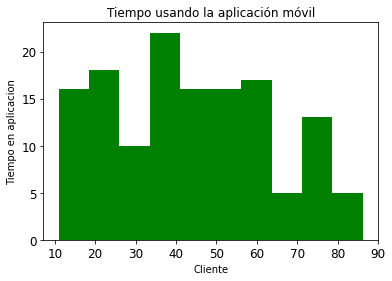

In [ ]:
df.groupby('Avatar')['Time on App'].sum().plot(kind='hist', color='green', title='Tiempo usando la aplicación móvil', fontsize=12)
plt.xlabel('Cliente')
plt.ylabel('Tiempo en aplicacion')

**Tiempo en aplicacion web**

Text(0, 0.5, 'Tiempo en aplicacion')

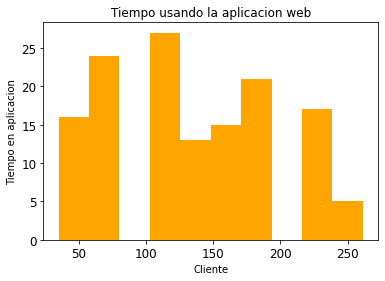

In [ ]:
df.groupby('Avatar')['Time on Website'].sum().plot(kind='hist', color='orange', title='Tiempo usando la aplicación web', fontsize=12)
plt.xlabel('Cliente')
plt.ylabel('Tiempo en aplicacion')

### Conclusiones.

Sin duda una actividad bastante inquietante, ya que por primera vez hemos realizado un análisis de datos más completo y basamos una decisión importante mediante el resultado que obtuvimos de ello. En pocas palabras, gracias a todas las herramientas trabajando en conjunto pudimos realizar un tratamiento de datos más eficiente y exacto.
